In [1]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 1.5 MB/s eta 0:00:00


In [72]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

short = 10 # 5, 10, 20
long = 50 # 20, 100, 200

In [73]:
df = fdr.DataReader('145720', "20200101")[['Close']]
df.head()

,Close
Date,
2020-01-02,53800
2020-01-03,53300
2020-01-06,51600
2020-01-07,52500
2020-01-08,50700


In [74]:
df['MA_S'] = df['Close'].rolling(window=short).mean()
df['MA_L'] = df['Close'].rolling(window=long).mean()
df['is_buy'] = np.where(df['MA_S'] > df['MA_L'], True, False)
df.head()

,Close,MA_S,MA_L,is_buy
Date,,,,
2020-01-02,53800,NaN,NaN,False
2020-01-03,53300,NaN,NaN,False
2020-01-06,51600,NaN,NaN,False
2020-01-07,52500,NaN,NaN,False
2020-01-08,50700,NaN,NaN,False


In [75]:
df['NextDay_Close'] = df['Close'].shift(-1) # 신호를 보고 다음날 종가에 매도
df.head()

,Close,MA_S,MA_L,is_buy,NextDay_Close
Date,,,,,
2020-01-02,53800,NaN,NaN,False,53300.0
2020-01-03,53300,NaN,NaN,False,51600.0
2020-01-06,51600,NaN,NaN,False,52500.0
2020-01-07,52500,NaN,NaN,False,50700.0
2020-01-08,50700,NaN,NaN,False,50100.0


<Axes: xlabel='Date'>

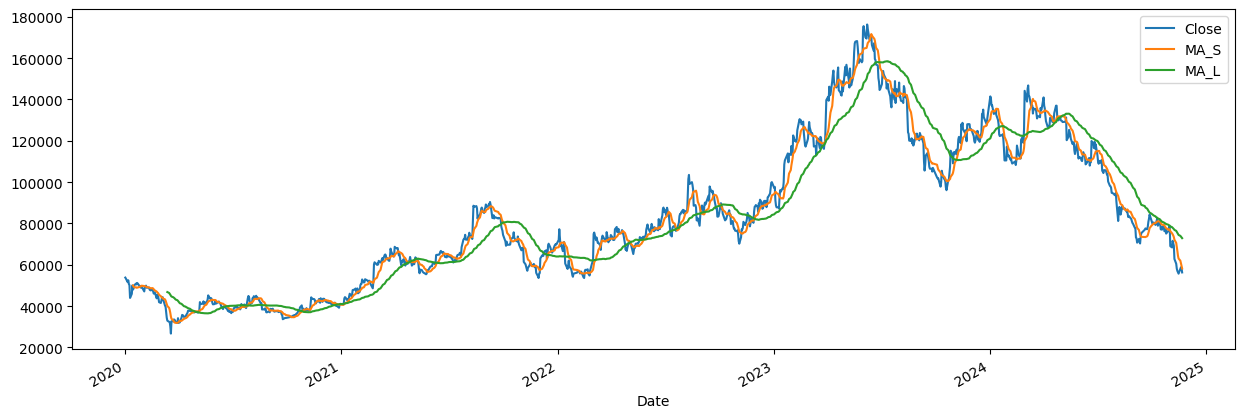

In [76]:
df[['Close', 'MA_S', 'MA_L']].plot(figsize = (15,5))

In [77]:
df.dropna(inplace = True)

In [78]:
df.loc[:, 'return'] = np.where(df['is_buy'] == True, df['NextDay_Close'] -  df['Close'], None) # short이 long보다 위에 있는 경우에는 수익을 얻음
df.head()

,Close,MA_S,MA_L,is_buy,NextDay_Close,return
Date,,,,,,
2020-03-13,32950,40045.0,46791.0,False,32400.0,None
2020-03-16,32400,39135.0,46363.0,False,32200.0,None
2020-03-17,32200,38085.0,45941.0,False,30150.0,None
2020-03-18,30150,36680.0,45512.0,False,26700.0,None
2020-03-19,26700,34915.0,44996.0,False,32700.0,None


In [79]:
df.loc[:, 'cum_return'] = df['return'].cumsum()

In [80]:
signal_date = df[df['is_buy'] != df['is_buy'].shift(1)].index
df.loc[signal_date, 'Signal'] = True
df.iloc[0, -1] = np.nan
df.head()

,Close,MA_S,MA_L,is_buy,NextDay_Close,return,cum_return,Signal
Date,,,,,,,,
2020-03-13,32950,40045.0,46791.0,False,32400.0,None,NaN,NaN
2020-03-16,32400,39135.0,46363.0,False,32200.0,None,NaN,NaN
2020-03-17,32200,38085.0,45941.0,False,30150.0,None,NaN,NaN
2020-03-18,30150,36680.0,45512.0,False,26700.0,None,NaN,NaN
2020-03-19,26700,34915.0,44996.0,False,32700.0,None,NaN,NaN


In [81]:
df.loc[:, 'BUY'] = np.where((df.loc[:, 'Signal'] == True) & (df.loc[:, 'is_buy'] == True), True, None)
df.loc[:, 'SELL'] = np.where((df.loc[:, 'Signal'] == True) & (df.loc[:, 'is_buy'] == False), True, None)
df.head()

,Close,MA_S,MA_L,is_buy,NextDay_Close,return,cum_return,Signal,BUY,SELL
Date,,,,,,,,,,
2020-03-13,32950,40045.0,46791.0,False,32400.0,None,NaN,NaN,None,None
2020-03-16,32400,39135.0,46363.0,False,32200.0,None,NaN,NaN,None,None
2020-03-17,32200,38085.0,45941.0,False,30150.0,None,NaN,NaN,None,None
2020-03-18,30150,36680.0,45512.0,False,26700.0,None,NaN,NaN,None,None
2020-03-19,26700,34915.0,44996.0,False,32700.0,None,NaN,NaN,None,None


In [82]:
BUY_DATE = df[df['BUY'] == True].index
SELL_DATE = df[df['SELL'] == True].index

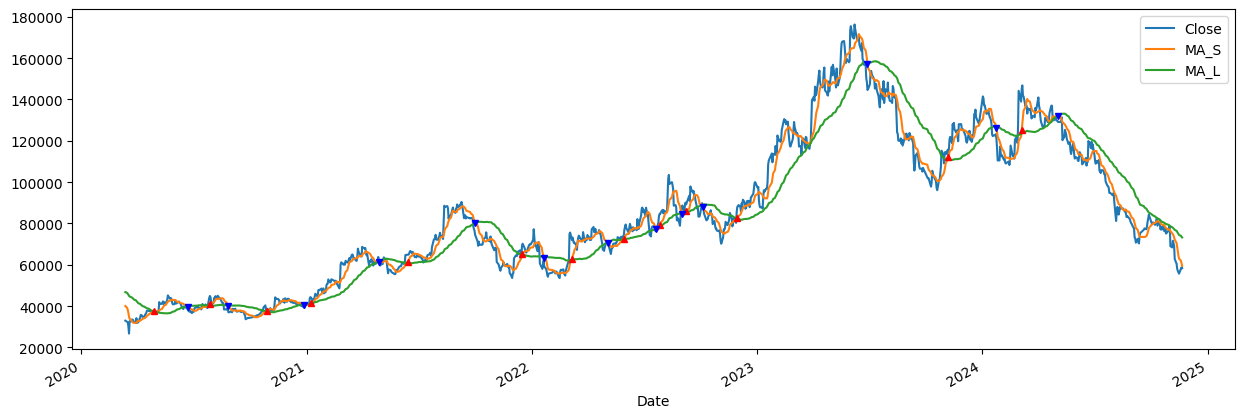

In [83]:
df[['Close', 'MA_S', 'MA_L']].plot(figsize = (15,5))
plt.plot(BUY_DATE, df.loc[BUY_DATE, 'MA_S'], '^', markersize = 4, color = 'r')
plt.plot(SELL_DATE, df.loc[SELL_DATE, 'MA_S'], 'v', markersize = 4, color = 'b')

In [84]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # 첫 번째 차트: 'Close', 'MA_S', 'MA_L'
# fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# # 'Close', 'MA_S', 'MA_L' 시각화
# fig.add_trace(
#     go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close'),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Scatter(x=df.index, y=df['MA_S'], mode='lines', name='MA_S'),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Scatter(x=df.index, y=df['MA_L'], mode='lines', name='MA_L'),
#     row=1, col=1
# )

# # 매수 신호
# fig.add_trace(
#     go.Scatter(x=BUY_DATE, y=df.loc[BUY_DATE, 'MA_S'], mode='markers',
#                marker=dict(size=8, color='red', symbol='triangle-up'),
#                name='Buy Signal'),
#     row=1, col=1
# )

# # 매도 신호
# fig.add_trace(
#     go.Scatter(x=SELL_DATE, y=df.loc[SELL_DATE, 'MA_S'], mode='markers',
#                marker=dict(size=8, color='blue', symbol='triangle-down'),
#                name='Sell Signal'),
#     row=1, col=1
# )


# # 각 subplot의 축 설정
# fig.update_xaxes(title_text="Date", row=1, col=1)
# fig.update_yaxes(title_text="Price", row=1, col=1)

# # 출력
# fig.show()

In [85]:
df['cum_return'] = df['cum_return'].ffill()
df.tail()

<ipython-input-85-4a4e03d4d6b4>:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Close,MA_S,MA_L,is_buy,NextDay_Close,return,cum_return,Signal,BUY,SELL
Date,,,,,,,,,,
2024-11-14,56300,64340.0,74926.0,False,55700.0,None,60850.0,NaN,None,None
2024-11-15,55700,63010.0,74434.0,False,58100.0,None,60850.0,NaN,None,None
2024-11-18,58100,61980.0,73998.0,False,58800.0,None,60850.0,NaN,None,None
2024-11-19,58800,60700.0,73614.0,False,58400.0,None,60850.0,NaN,None,None
2024-11-20,58400,59490.0,73226.0,False,56300.0,None,60850.0,NaN,None,None


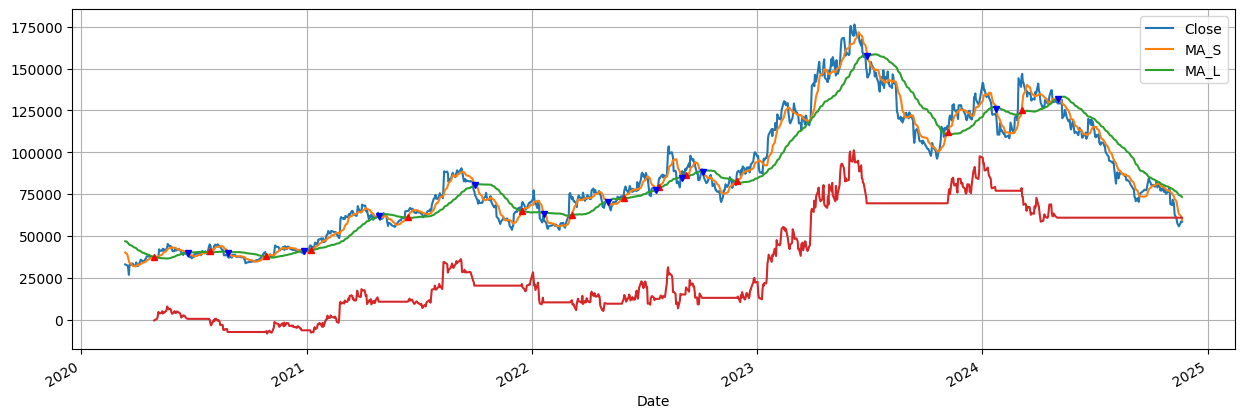

In [86]:
df[['Close', 'MA_S', 'MA_L']].plot(figsize = (15,5))
plt.plot(BUY_DATE, df.loc[BUY_DATE, 'MA_S'], '^', markersize = 4, color = 'r')
plt.plot(SELL_DATE, df.loc[SELL_DATE, 'MA_S'], 'v', markersize = 4, color = 'b')
df['cum_return'].plot(figsize = (15,5))
plt.grid()

In [87]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # 첫 번째 차트: 'Close', 'MA_S', 'MA_L'
# fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# # 'Close', 'MA_S', 'MA_L' 시각화
# fig.add_trace(
#     go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close'),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Scatter(x=df.index, y=df['MA_S'], mode='lines', name='MA_S'),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Scatter(x=df.index, y=df['MA_L'], mode='lines', name='MA_L'),
#     row=1, col=1
# )

# # 매수 신호
# fig.add_trace(
#     go.Scatter(x=BUY_DATE, y=df.loc[BUY_DATE, 'MA_S'], mode='markers',
#                marker=dict(size=8, color='red', symbol='triangle-up'),
#                name='Buy Signal'),
#     row=1, col=1
# )

# # 매도 신호
# fig.add_trace(
#     go.Scatter(x=SELL_DATE, y=df.loc[SELL_DATE, 'MA_S'], mode='markers',
#                marker=dict(size=8, color='blue', symbol='triangle-down'),
#                name='Sell Signal'),
#     row=1, col=1
# )

# # 두 번째 차트: 'cum_return'
# fig.add_trace(
#     go.Scatter(x=df.index, y=df['cum_return'], mode='lines', name='Cumulative Return'),
#     row=2, col=1
# )

# # 각 subplot의 축 설정
# fig.update_xaxes(title_text="Date", row=2, col=1)
# fig.update_yaxes(title_text="Price", row=1, col=1)
# fig.update_yaxes(title_text="Cumulative Return", row=2, col=1)

# # 출력
# fig.show()